In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm
import datetime
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

In [ ]:
# !unzip /content/tmp.zip

# Data Analysis for S&P 500 Index from 2012 to 2022

In [ ]:
data_origin = pd.read_csv('/content/tmp/data_origin.csv/part-00000-6cf2e280-a147-4300-a46c-9d14b77e7126-c000.csv')
data_review = pd.read_csv('/content/tmp/data_review.csv/part-00000-a255cb2c-880e-47c4-82a5-9818448a82b6-c000.csv')
price_review = pd.read_csv('/content/tmp/price_review.csv/part-00000-07ad3bc4-a7c5-48ec-889d-6acfb7acff6c-c000.csv')
spx_return = pd.read_csv('/content/tmp/spx_return.csv/part-00000-4bf75c1e-619a-498d-a750-b081cb908a3a-c000.csv')
font = fm.FontProperties(fname='OpenSans-Regular.ttf')

# 1 S&P500 Index's historical data (2012-2022)

The S&P 500 is one of the most important financial barometers to indicate the overall status of the macro economy. \\
The S&P 500 is an equity index made up of 500 of the largest companies traded on either the NYSE, Nasdaq, or Cboe. it is calculated by adding each company's float-adjusted market capitalization.  \\
From the historical line chart of S&P 500 Index, we can discover steady economic growth in the last decade, with a downward trend after 2021.

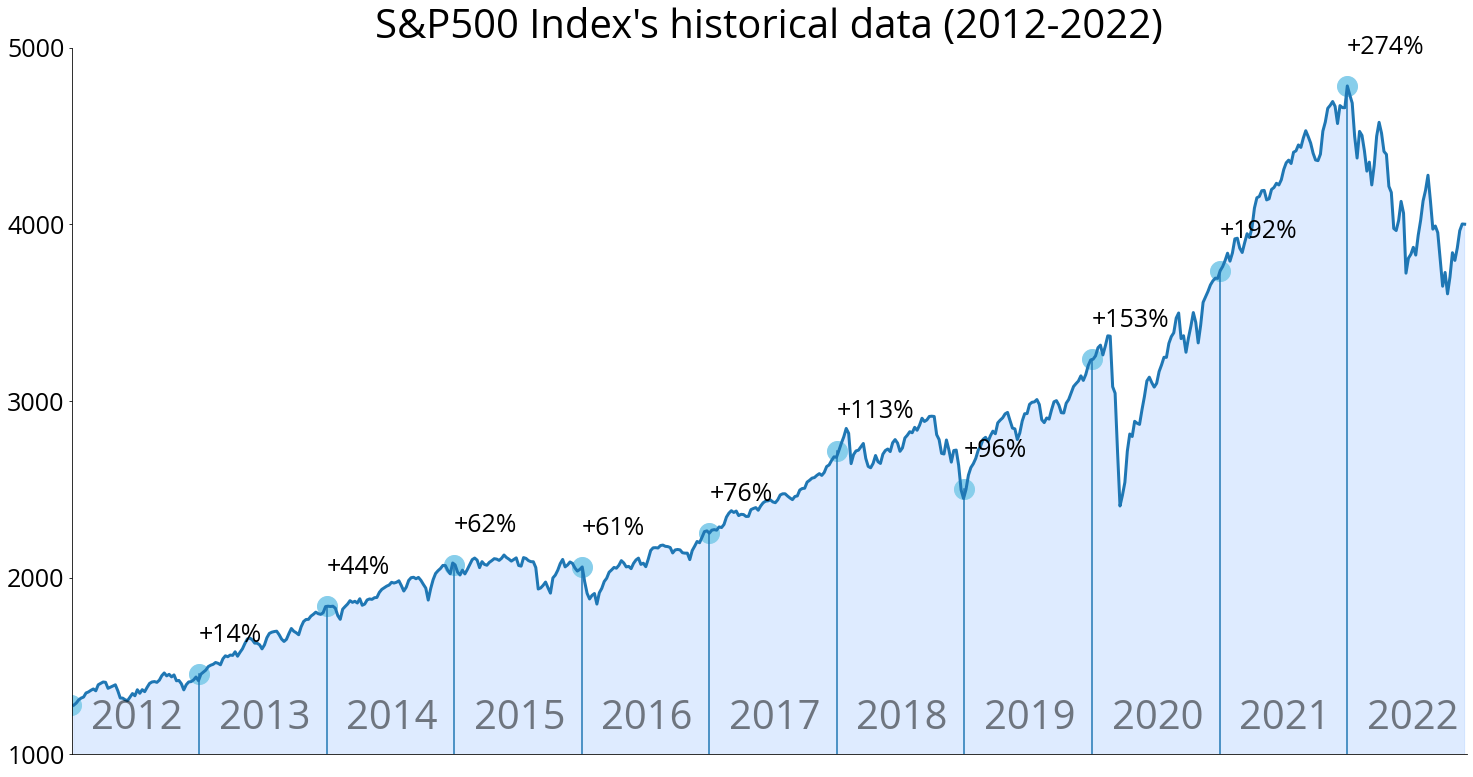

In [ ]:
df_tmp = data_review.copy()
data_review['Date'] = pd.to_datetime(data_review['Date'])
sp500 = data_review.set_index('Date')
sp500 = sp500.resample('1W').mean()
df_tmp = sp500.reset_index()
df_tmp['Year'] = df_tmp['Date'].apply(lambda x : int(str(x).split("-")[0]))

fig, ax = plt.subplots(figsize=(25,13),facecolor="white")
plt.plot(sp500, lw=3)
plt.fill_between(sp500.index, 0, sp500['Close'].values, color='#93BFFF',alpha=0.3)
plt.ylim(1000,5000)
plt.xlim(datetime.datetime(2012,1,2),datetime.datetime.now())

start_price = df_tmp['Close'].iloc[0]

for i in range(2012, 2023):
    year_tmp =  df_tmp[df_tmp['Year'] == i]
    year_tmp = year_tmp.reset_index()
    plt.scatter(x=datetime.datetime(i,1, 1), y=year_tmp[year_tmp['Year'] == i].loc[0, 'Close'], s=400, color='skyblue')
    plt.axvline(x=datetime.datetime(i,1, 1), ymin=0, ymax= (year_tmp[year_tmp['Year'] == i].loc[0, 'Close']-1000)/4000)
    if i == 2023:
        plt.text(s=f"+{round(year_tmp[year_tmp['Year'] == i].loc[0, 'Close']/start_price*100-100)}%", x=datetime.datetime(i,1, 1),
            y = year_tmp[year_tmp['Year'] == i].loc[0, 'Close'], va='center', ha='right', fontproperties=font, fontsize=25)
        continue
    plt.text(s=i, x=datetime.datetime(i,7,7),y=1200,fontproperties=font, fontsize=40, va='center',ha='center',alpha=0.5)
    if i != 2012:
        plt.text(s=f"+{round(year_tmp[year_tmp['Year'] == i].loc[0, 'Close']/start_price*100-100)}%", x=datetime.datetime(i,1, 1),
            y = year_tmp[year_tmp['Year'] == i].loc[0, 'Close']+150, va='bottom', ha='left', fontproperties=font, fontsize=25)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xticks([])
plt.yticks([*range(1000,6000,1000)],fontproperties=font,fontsize=25)
plt.text(s="", x=datetime.datetime(2012,2,1),y=5000, va='center', ha='left')
plt.title("S&P500 Index's historical data (2012-2022)", fontproperties=font, fontsize=40)
plt.show()

# 2 S&P500 Index Price Review
## 2.1 Candlestick Plots
A candlestick chart (also called K-line) is a style of financial chart used to describe price movements of a security, derivative, or currency. \\
Adjust the progress bar to see more details.

In [ ]:
df1 = data_origin.copy()
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.set_index(df1['Date']).sort_index() 
fig = go.Figure(data=[go.Candlestick(x=df1['Date'],
                                    open=df1['Open'],
                                    high=df1['High'],
                                    low=df1['Low'],
                                    close=df1['Close'])])
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))
fig.update_layout(title="Candlestick Plots")
fig.show()

## 2.2 Return fluctuations
In the past 10 years, the biggest return fluctuation happened in 2020 May.

In [ ]:
df = spx_return.copy()
fig = px.line(df,x="Date",y="Return",title="Returns fluctuations")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))
fig.show()

# 3 Time Series Analysis for S&P 500 Index

In [ ]:
df1.resample(rule='A').max()
df1['Close'].resample(rule='A').max()
display(HTML(df1.tail(5).to_html()))

,Date,Open,High,Low,Close
Date,,,,,
2022-11-23,2022-11-23,4001.02,4033.78,3998.66,4027.26
2022-11-25,2022-11-25,4023.34,4034.02,4020.76,4026.12
2022-11-28,2022-11-28,4005.36,4012.27,3955.77,3963.94
2022-11-29,2022-11-29,3964.19,3976.77,3937.65,3957.63
2022-11-30,2022-11-30,3957.18,4080.11,3938.58,4080.11


## 3.1 Simple Moving Average

SMA calculates the average of prices over a given interval of time and is used to determine the trend of the stock. \\
As defined above, I will create a slow SMA (SMA_Year) and a fast SMA (SMA_Month). \\
Although SMA is quite common, it contains a bias of giving equal weight to each value in the past.

In [ ]:
df1['SMA_Month'] = df1['Close'].rolling(30).mean().shift()
df1['SMA_Year'] = df1['Close'].rolling(365).mean().shift()
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.Date,y=df1.SMA_Month,name='SMA_Month'))
fig.add_trace(go.Scatter(x=df1.Date,y=df1.SMA_Year,name='SMA_Year'))
fig.add_trace(go.Scatter(x=df1.Date, y=df1.Close,name='Close', opacity=0.3))
fig.show()

## 3.2 Exponential Moving Average

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. \\
Basically what it means is that the newer stock price data has a higher weightage/significance on the price than older days.

In [ ]:
df1['EMA_Month'] = df1['Close'].ewm(30).mean().shift()
df1['EMA_Year'] = df1['Close'].ewm(365).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.Date,y=df1.EMA_Month,name='EMA_Month'))
fig.add_trace(go.Scatter(x=df1.Date,y=df1.EMA_Year,name='EMA_Year'))
fig.add_trace(go.Scatter(x=df1.Date,y=df1.Close,name='Close', opacity=0.3))
fig.show()

## SMA and EMA Comparison

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.Date,y=df1.SMA_Month,name='SMA_Month'))
fig.add_trace(go.Scatter(x=df1.Date,y=df1.EMA_Month,name='EMA_Month'))
fig.add_trace(go.Scatter(x=df1.Date,y=df1.Close,name='Close', opacity=0.3))
fig.show()

## 3.3 Relative Strength Index

A momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock. \\
If the RSI value is >70 then the stock is overbought and if <30 then its oversold. \\
From the chart, we can see that overbought or oversold conditions are frequent in the recent 10 years.

In [ ]:
close = data_origin['Close']
delta = close.diff()
delta = delta[1:]
pricesUp = delta.copy()
pricesDown = delta.copy()
pricesUp[pricesUp<0]=0
pricesDown[pricesDown>0]=0
rollUp = pricesUp.rolling(30).mean()
rollDown = pricesDown.abs().rolling(30).mean()
rs = rollUp/rollDown
rsi = 100.0 - (100.0 / (1.0 + rs))
rsi = rsi.reset_index()
rsi = rsi.rename(columns={'Close': 'RSI'}) 
rsi['date'] = pd.date_range(start='1/3/2015', periods=len(rsi), freq='D')
fig = go.Figure(go.Scatter(x=rsi.date,y=rsi.RSI,name='RSI'))
fig.add_hline(y=30)
fig.add_hline(y=70)
fig.show()

## 3.4 Moving Average Convergence Divergence
MACD uses two exponentially moving averages and creates a trend analysis based on their convergence or divergence. \\
The most commonly used MACD slow and fast signals are based on 30 days and 365 days respectively. \\
The MACD is calculated by subtracting the 30-period exponential moving average (EMA) from the 365-period EMA. \\
Similar to RSI, MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line. \\

In [ ]:
df1['EMA_Month'] = pd.Series(df1['Close'].ewm(span=30).mean())
df1['EMA_Year'] = pd.Series(df1['Close'].ewm(span=365).mean())
df1['MACD'] = pd.Series(df1['EMA_Month'] - df1['EMA_Year'])
df1['MACD_signal'] = pd.Series(df1.MACD.ewm(span=9,min_periods=9).mean())

fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.Date,y=df1.MACD,name='MACD'))
fig.add_trace(go.Scatter(x=df1.Date,y=df1.MACD_signal,name='MACD_signal'))
fig.show()

## 3.5 Time Series Decomposition
We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. \\
The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual. \\
The seasonal_decompose in statsmodels is used to implements the decomposition. \\

There is clearly an upward trend in the above plot.
You can also see the uniform seasonal change. \\
Non-uniform noise that represent outliers and missing values \\

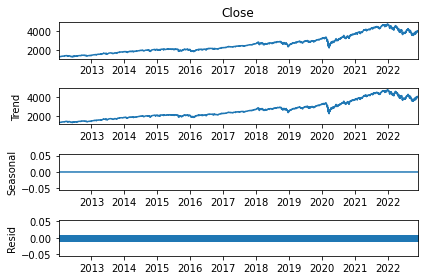

In [ ]:
series = df1.Close
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily

figure = result.plot()

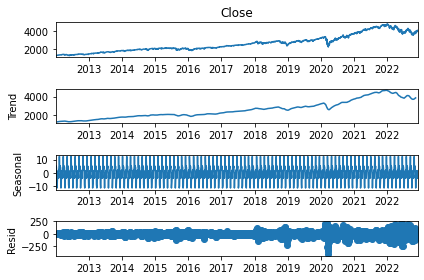

In [ ]:
series = df1.Close
result = seasonal_decompose(series, model='additive',period=30) # The frequncy is monthly

figure = result.plot()

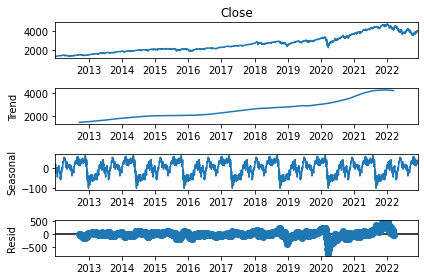

In [ ]:
series = df1.Close
result = seasonal_decompose(series, model='additive',period=365) # The frequncy is yearly
seasonal = result.__dict__["_seasonal"]
trend = result.__dict__["_trend"]
resid = result.__dict__["_resid"]
observed = result.__dict__["_observed"]
tmp1 = pd.DataFrame.from_dict(seasonal)
#tmp1.to_csv('file1.csv' , index = True)
tmp2 = pd.DataFrame.from_dict(trend)
#tmp2.to_csv('file2.csv' , index = True)
tmp4 = pd.DataFrame.from_dict(resid)
#tmp4.to_csv('file4.csv' , index = True)
tmp5 = pd.DataFrame.from_dict(observed)
#tmp5.to_csv('file5.csv' , index = True)
figure = result.plot()